In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install textblob

In [6]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import tweepy

In [7]:
twitterApiKey = 'PRIVATE'
twitterApiSecret = 'PRIVATE'
twitterApiAccessToken = 'PRIVATE'
twitterApiAccessTokenSecret = 'PRIVATE'

In [8]:
auth=tweepy.OAuthHandler(twitterApiKey,twitterApiSecret)
auth.set_access_token(twitterApiAccessToken,twitterApiAccessTokenSecret)
twitterApi = tweepy.API(auth,wait_on_rate_limit=True)

In [9]:
twitterAccount = "KamalaHarris"

In [10]:
tweets = tweepy.Cursor(twitterApi.user_timeline,
                       screen_name=twitterAccount,
                       count=None,
                       since_id=None,
                       max_id=None,trim_user=True,exclude_replies=True,contribubtor_details=False,
                       include_entities=False).items(50);

In [11]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets],columns=['Tweet'])

In [12]:
df.head(10)

,Tweet
0,RT @VP: The American Jobs Plan won't just crea...
1,"RT @WhiteHouse: Since taking office, the Biden..."
2,RT @VP: Nearly 10 million Americans are still ...
3,RT @VP: Every American who wants a job that pa...
4,RT @VP: No child should have to drink water po...
5,RT @POTUS: Universal background checks are sup...
6,RT @VP: The solutions to curb gun violence alr...
7,RT @VP: COVID has highlighted health inequitie...
8,"RT @POTUS: By April 19, every adult will be el..."
9,"RT @VP: 916,000 jobs were added in March. Wome..."


In [13]:
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    txt = re.sub(r'#', '', txt)
    txt = re.sub(r'RT : ', '', txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9_\.\/]+', '', txt)
    return txt

In [14]:
df['Tweet']=df['Tweet'].apply(cleanUpTweet)

In [15]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [16]:
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [17]:
df['Subjectivity']=df['Tweet'].apply(getTextSubjectivity)
df['Polarity']=df['Tweet'].apply(getTextPolarity)

In [18]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,The American Jobs Plan won't just create jobs....,0.000000,0.000000
1,"Since taking office, the Biden-Harris Administ...",0.000000,0.000000
2,Nearly 10 million Americans are still unemploy...,0.400000,0.100000
3,Every American who wants a job that pays fairl...,0.375000,0.350000
4,No child should have to drink water poisoned b...,0.000000,0.000000
5,Universal background checks are supported by t...,0.500000,0.000000
6,The solutions to curb gun violence already exi...,0.000000,0.000000
7,COVID has highlighted health inequities that h...,0.400000,-0.050000
8,"By April 19, every adult will be eligible to b...",0.300000,0.100000
9,"916,000 jobs were added in March. Women accoun...",0.727273,0.318182


In [19]:
df = df.drop(df[df['Tweet']==''].index)

In [20]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,The American Jobs Plan won't just create jobs....,0.000000,0.000000
1,"Since taking office, the Biden-Harris Administ...",0.000000,0.000000
2,Nearly 10 million Americans are still unemploy...,0.400000,0.100000
3,Every American who wants a job that pays fairl...,0.375000,0.350000
4,No child should have to drink water poisoned b...,0.000000,0.000000
5,Universal background checks are supported by t...,0.500000,0.000000
6,The solutions to curb gun violence already exi...,0.000000,0.000000
7,COVID has highlighted health inequities that h...,0.400000,-0.050000
8,"By April 19, every adult will be eligible to b...",0.300000,0.100000
9,"916,000 jobs were added in March. Women accoun...",0.727273,0.318182


In [21]:
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"

In [22]:
df["Score"]=df['Polarity'].apply(getTextAnalysis)

In [23]:
df.head(50)

,Tweet,Subjectivity,Polarity,Score
0,The American Jobs Plan won't just create jobs....,0.000000,0.000000,Neutral
1,"Since taking office, the Biden-Harris Administ...",0.000000,0.000000,Neutral
2,Nearly 10 million Americans are still unemploy...,0.400000,0.100000,Positive
3,Every American who wants a job that pays fairl...,0.375000,0.350000,Positive
4,No child should have to drink water poisoned b...,0.000000,0.000000,Neutral
5,Universal background checks are supported by t...,0.500000,0.000000,Neutral
6,The solutions to curb gun violence already exi...,0.000000,0.000000,Neutral
7,COVID has highlighted health inequities that h...,0.400000,-0.050000,Negative
8,"By April 19, every adult will be eligible to b...",0.300000,0.100000,Positive
9,"916,000 jobs were added in March. Women accoun...",0.727273,0.318182,Positive


In [24]:
positive=df[df['Score']=="Positive"]
print(str(positive.shape[0]/(df.shape[0])*100)+"% of Positive tweets")
pos=positive.shape[0]/df.shape[0]*100

38.0% of Positive tweets


In [25]:
negative=df[df['Score']=="Negative"]
print(str(negative.shape[0]/(df.shape[0])*100)+"% of Negative tweets")
neg=negative.shape[0]/df.shape[0]*100

12.0% of Negative tweets


In [26]:
neutral=df[df['Score']=="Neutral"]
print(str(neutral.shape[0]/(df.shape[0])*100)+"% of Neutral tweets")
neutrall=positive.shape[0]/df.shape[0]*100

50.0% of Neutral tweets


In [27]:
explode={0,0.1,0}
labels='Positive','Negative','Neutral'
sizes=[pos,neg,neutrall]
colors=['yellowgreen','lightcoral','gold']

ValueError: 'explode' must be of length 'x'

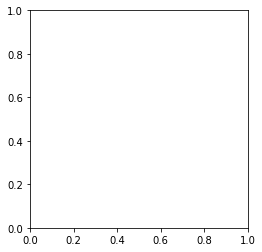

In [28]:
plt.pie(sizes,explode=explode,colors=colors,autopct='%l.lf%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
plt.savefig("Sentiment_Analysis.png")

<BarContainer object of 3 artists>

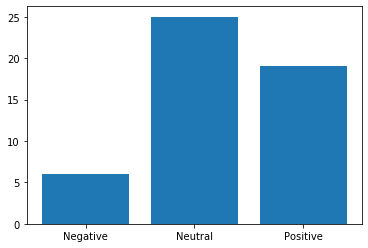

In [29]:
labels = df.groupby('Score').count().index.values
values = df.groupby('Score').size().values
plt.bar(labels,values)

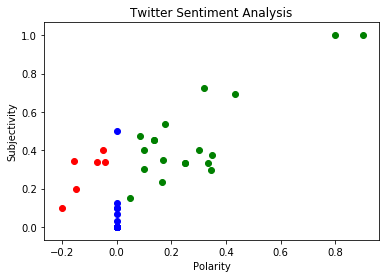

In [30]:
for index, row in df.iterrows():
    if row['Score']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Score']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    elif row['Score']=='Neutral':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
        
plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show() 